# Supervised Learning Project

# Tratamiento de los datos

Para este proyecto he elegido un dataset de vino, el cual incluye 12 columnas numéricas indicando diferentes características del vino. 

Mi idea es predecir la calidad del vino (columna quality), en base al resto de características. Para ello, voy a ir tratando y transformando los datos para limpiar mi dataset.

Para empezar, importo las librerías que voy a necesitar para este proyecto. Y posteriormente, importo y exploro el dataset con la función head().

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [3]:
wines = pd.read_csv('/home/alejandro/IRONHACK/LABORATORIOS/datamad0119/module-3/supervised-learning-project/your-code/wine.csv')

In [290]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Imprimo las dimensiones del dataset para saber si hay suficientes filas con las que trabajar.

In [291]:
wines.shape

(1599, 12)

Veo que todas las columnas son números, y en la casilla de abajo lo compruebo mirando el tipo de dato de cada columna. Por tanto, no haría falta hacer mayores cambios sobre ninguna columna.

In [292]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Ahora voy a ver si hay alguna columna que pueda eliminar debido a una alta correlación entre alguna de ellas. Pero como podemos ver, no haría falta eliminar ninguna columna por este motivo.

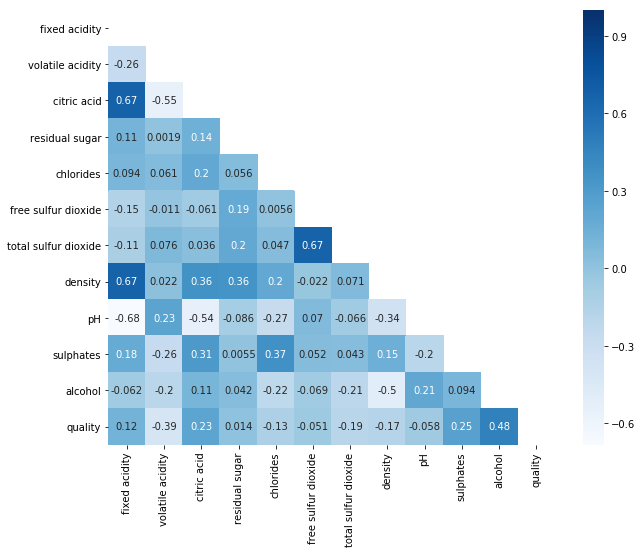

In [293]:
mask = np.zeros_like(wines.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(wines.corr(), mask=mask, annot=True, cmap="Blues")

Continúo viendo siendo hay algún valor nulo en el dataset, para limpiar esas filas, y al no haber ninguno continúo con mi análisis.

In [294]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Analizo cómo es la distribución de la variables que quiero predecir, y veo que la mayoría de los vinos están clasificados como 5 y 6.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

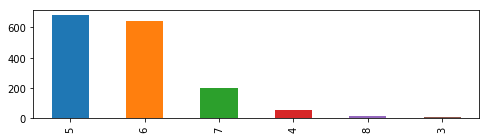

In [295]:
fig, ax = plt.subplots(figsize=(8,2))
ax = wines['quality'].value_counts().plot.bar()

wines['quality'].value_counts()

# Modelo 1: 'OneVsRestClassifier(RandomForestClassifier)'

Empiezo dividendo los datos entre los que voy a estudiar y los que voy a predecir.

In [296]:
y = pd.get_dummies(data=wines.quality)
X = wines.loc[:, wines.columns != 'quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Y establezco el modelo de regresión que voy a utilizar, en este caso, OneVsRestClassifier(RandomForestClassifier).

También hago un cross validation de 10 veces e imprimo las scores, para ver cómo de bueno es mi modelo.

In [297]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.46 0.48 0.28 0.38 0.43 0.31 0.34 0.35 0.39 0.33]
Accuracy: 0.38 (+/- 0.12)


Como podemos observar, es un modelo poco predictivo, teniendo un accuracy del 0.38.

A continuación le aplico un fit al modelo e imprimo su score.

In [298]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.56875

In [299]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.56875


Como vemos, su capacidad predictiva ha mejorado un poco y ya supera el 50%, aunque sigue siendo baja.

# Accuracy, Precision, Recall y F-score

Continúo calculando la accuracy, precision y recall y fscore, para obtener más métricas con las que valorar el modelo.

In [300]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[2 2 2 2 3 2 3 2 3 2 4 2 3 2 2 3 2 3 2 2 2 2 2 2 3 4 3 2 2 4 4 2 2 3 3 4 3
 3 2 3 1 3 3 2 2 2 2 2 3 1 3 2 3 2 4 1 2 4 2 5 4 3 0 2 3 2 4 3 3 4 2 3 2 3
 2 2 3 4 2 2 2 2 2 4 5 2 3 2 3 2 2 3 2 4 3 2 2 1 3 3 2 3 3 2 2 3 2 2 3 4 3
 2 3 3 2 4 4 3 4 3 3 2 3 2 3 3 2 3 3 4 4 3 2 3 0 2 4 2 2 2 3 2 2 4 2 3 2 1
 2 3 2 3 2 2 4 3 3 2 4 4 2 4 2 2 4 3 2 3 2 3 2 2 3 4 2 2 2 3 2 2 3 3 3 2 3
 4 1 2 0 3 3 2 3 2 4 2 4 3 4 4 5 3 3 2 2 3 3 2 2 3 2 2 2 2 3 3 2 3 3 4 3 1
 3 2 3 2 2 2 3 2 3 3 5 3 2 2 4 3 2 3 2 2 2 2 3 2 2 4 3 3 3 3 2 3 2 2 4 3 4
 3 4 3 4 2 3 2 4 2 2 2 2 2 3 3 2 2 3 3 2 3 2 2 4 2 2 2 2 3 3 2 2 3 3 3 3 3
 2 3 2 2 2 2 2 4 2 2 3 2 2 3 2 4 3 3 2 2 3 2 4 3]


In [301]:
accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.575

In [302]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.25764580369843526

In [303]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = [3, 4, 5, 6, 7, 8]
precision_recall.index.name = 'quality'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1_score
quality,,,
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.827068,0.743243,0.782918
6,0.611650,0.552632,0.580645
7,0.785714,0.250000,0.379310
8,0.000000,0.000000,0.000000


Como podemos observar, las 3 métricas son más altas para calidades de 5, 6 y 7. Para el resto, las predicciones son muy malas.

# Confusion matrix

A continuación voy a calcular la confusion matrix para ver cómo se han distribuido mis predicciones.

Confusion matrix, without normalization
[[  0   0   2   1   0   0]
 [  3   0   3   1   0   0]
 [ 21   0 110  17   0   0]
 [ 31   0  18  63   2   0]
 [ 13   0   0  20  11   0]
 [  2   0   0   1   1   0]]


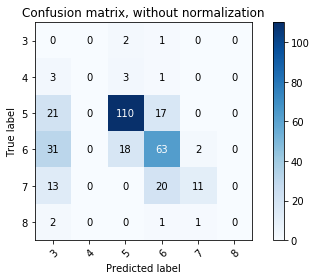

In [304]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

Como se puede ver, las predicciones para calidades de 5 y 6 aciertan con relativa frecuencia, pero para el resto las predicciones han sido bastante malas.

# ROC Curve

In [ ]:
def plotMetricsCompare(X, y, cls1):
    cls1.fit(X_train, y_train)
    
    y_pred_proba1 = cls1.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y, y_pred_proba1)
    
    plt.title("AUC Model 1: {:2f}".format(auc1))
    plt.plot(fpr1,tpr1)

    plt.legend(["Model 1"])

plotMetricsCompare(X, y, clf)

In [196]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [199]:
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

In [ ]:
clf1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = clf1.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Modelo 2: 'OneVsRestClassifier(linear_model.LinearRegression)'

Repito los mismos cálculos que con el Modelo 1.

In [305]:
y = pd.get_dummies(data=wines.quality)
X = wines.loc[:, wines.columns != 'quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [306]:
clf = OneVsRestClassifier(linear_model.LinearRegression())
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.49 0.43 0.29 0.38 0.56 0.36 0.31 0.29 0.45 0.31]
Accuracy: 0.39 (+/- 0.18)


In [307]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.375

In [308]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.375


# Accuracy, Precision, Recall y F-score

In [309]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[1 4 2 3 2 3 3 4 5 3 2 3 5 3 3 2 2 3 3 2 3 3 3 2 3 2 3 3 4 0 2 3 2 2 2 3 3
 2 3 2 4 2 3 3 3 3 3 3 3 2 3 2 1 2 4 4 2 2 2 3 3 3 3 3 2 1 3 4 2 2 2 2 4 2
 2 3 4 2 2 3 2 2 3 3 3 2 2 3 4 3 3 3 2 2 2 3 2 4 3 3 2 1 2 3 2 4 3 3 3 4 4
 4 3 2 2 3 3 3 3 2 2 2 2 2 2 2 3 2 2 2 0 3 3 3 2 3 2 3 2 3 3 3 2 2 4 3 4 3
 2 4 2 3 2 4 3 2 2 4 3 3 2 1 2 3 1 2 3 3 3 3 2 3 2 2 2 2 3 2 2 3 2 2 3 3 2
 4 2 3 3 2 2 3 3 3 3 3 2 2 2 4 4 2 2 4 3 3 2 2 2 3 4 4 3 3 0 3 3 3 4 4 3 2
 3 3 3 2 2 5 2 2 3 3 2 4 2 3 4 2 4 2 3 2 3 2 2 2 2 2 3 3 3 4 3 3 3 2 2 3 3
 2 3 2 2 2 2 3 3 3 2 1 2 4 4 1 3 2 3 2 4 3 3 4 2 3 4 3 2 4 2 4 4 3 3 3 4 2
 3 2 2 3 4 2 3 3 3 3 3 2 2 2 2 4 4 3 2 2 3 3 2 2]


In [310]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.375

In [311]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.15461753731343283

In [312]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = [3, 4, 5, 6, 7, 8]
precision_recall.index.name = 'quality'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1_score
quality,,,
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.686567,0.718750,0.702290
6,0.451613,0.208955,0.285714
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000


# Confusion matrix

Confusion matrix, without normalization
[[ 0  0  3  0  0  0]
 [ 4  0  4  0  0  0]
 [33  0 92  3  0  0]
 [73  0 33 28  0  0]
 [13  0  2 29  0  0]
 [ 1  0  0  2  0  0]]


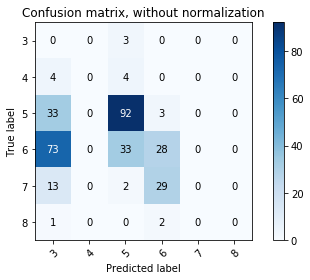

In [313]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

# ROC Curve

# Transformo quality a bins para reducir las variables a predecir

In [4]:
wines_aux = wines.copy()

In [5]:
quality_labels = ['Low', 'Medium', 'High']
cutoffs = [0,4,6,10]
quality_bins = pd.cut(wines_aux.quality,cutoffs, labels=quality_labels)
wines_aux['quality_bins'] = quality_bins
wines_aux.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bins
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [6]:
wines_aux.drop(['quality'], axis=1, inplace=True)
wines_aux.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bins
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [7]:
y = pd.get_dummies(data=wines_aux.quality_bins)
X = wines_aux.loc[:, wines_aux.columns != 'quality_bins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.85625    0.85625    0.76875    0.75625    0.85625    0.675
 0.7125     0.78125    0.88125    0.77987421]
Accuracy: 0.79 (+/- 0.13)


In [9]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.871875

In [10]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.871875


In [11]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[1 1 1 1 2 1 1 1 0 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 1 0 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 2 1 1 0 2 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1
 1 1 0 1 0 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 1
 1 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 1 1 1 1 0]


In [12]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.884375

In [13]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.5530588907947399

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Low', 'Medium', 'High']
precision_recall.index.name = 'quality'
precision_recall

,precision,recall,f1_score
quality,,,
Low,0.250000,0.181818,0.210526
Medium,0.902439,0.977358,0.938406
High,0.880000,0.500000,0.637681


Confusion matrix, without normalization
[[  2   9   0]
 [  3 259   3]
 [  3  19  22]]


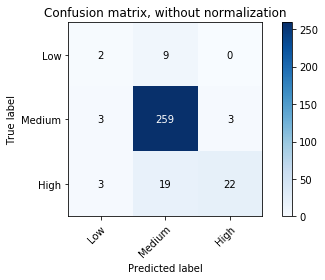

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [17]:
y = pd.get_dummies(data=wines_aux.quality_bins)
X = wines_aux.loc[:, wines_aux.columns != 'quality_bins']

In [18]:
y = label_binarize(y, classes=['Low', 'Medium', 'High'])
n_classes = y.shape[1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [22]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [24]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [25]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [26]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [27]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

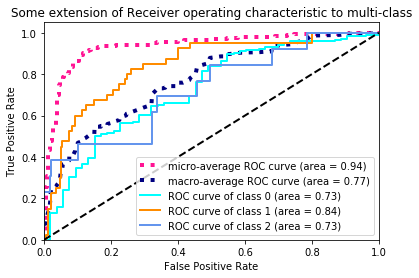

In [29]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Conclusiones